# Kaggle - Titanic

In [2]:
from pathlib import Path
import kaggle
import numpy as np
import os
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

## Load dataset

In [3]:
titanic_path = os.path.join("datasets", "titanic")
Path(titanic_path).mkdir(parents=True, exist_ok=True)

In [10]:
os.system(f"kaggle competitions download -c titanic -p {titanic_path}")

0

In [1]:
file_path = os.path.join(titanic_path, "titanic.zip")

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(titanic_path)

NameError: name 'os' is not defined

In [236]:
train_data = pd.read_csv(os.path.join(titanic_path, "train.csv"))
test_data = pd.read_csv(os.path.join(titanic_path, "test.csv"))

In [237]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [238]:
X_train = train_data[train_data.columns.drop("Survived")]
y_train = train_data["Survived"]
X_test = test_data

## Exploratory data analysis

In [239]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [240]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [241]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [242]:
def plot_data(data, column, chart_type="bar", size=(6, 6)):
    pclass_values = data[column].value_counts()
    y_pos = pclass_values.index
    x_pos = list(pclass_values)
    fig, ax = plt.subplots(1, 1)
    ax.bar(y_pos, x_pos)
    fig.set_size_inches(size)
    plt.xlabel(column)
    plt.ylabel("Amount")
    plt.xticks(y_pos)
    plt.show()

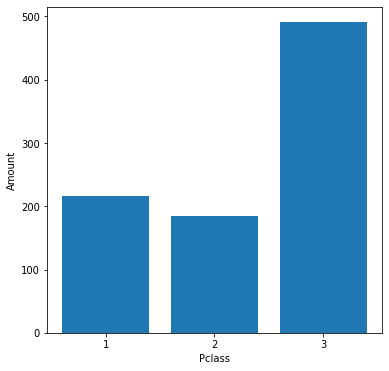

In [243]:
plot_data(X_train, "Pclass")

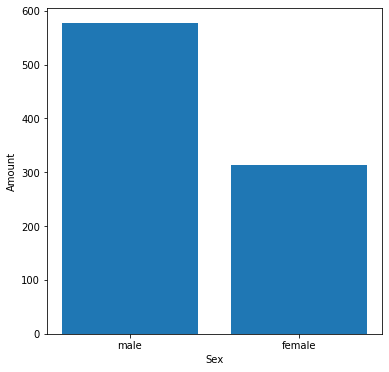

In [244]:
plot_data(X_train, "Sex")

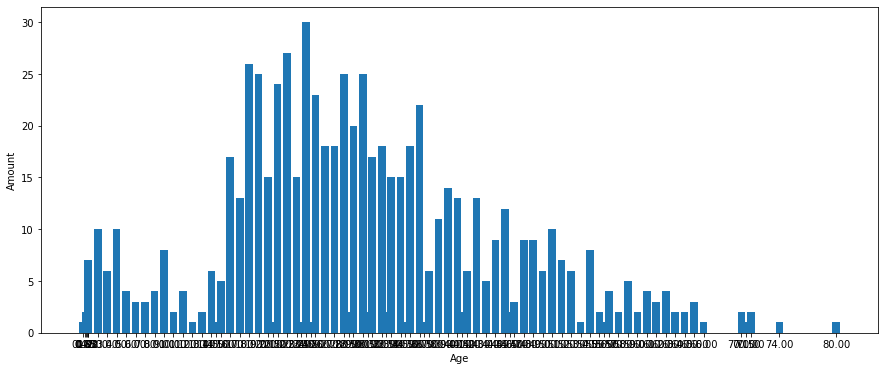

In [245]:
plot_data(X_train, "Age", size=(15, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE05507648>]],
      dtype=object)

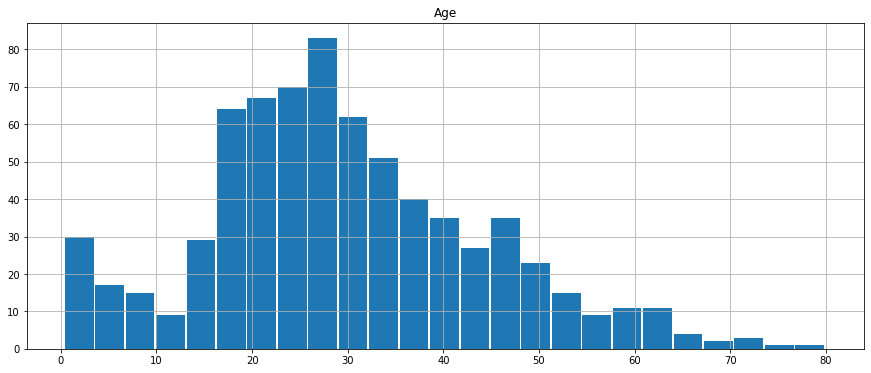

In [261]:
X_train.hist("Age", bins=25, width=3, figsize=(15, 6))

In [298]:
age_data = pd.DataFrame(X_train["Age"].copy())
age_data["Survived"] = y_train
age_data.fillna(-10, inplace=True)
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
Age         891 non-null float64
Survived    891 non-null int64
dtypes: float64(1), int64(1)
memory usage: 14.0 KB


In [318]:
age_summary = pd.DataFrame(age_data.groupby(by="Age")["Survived"].mean())
age_summary["Count"] = age_data.groupby(by="Age")["Survived"].count()
age_summary[50:80]

,Survived,Count
Age,,
50.0,0.500000,10
51.0,0.285714,7
52.0,0.500000,6
53.0,1.000000,1
54.0,0.375000,8
55.0,0.500000,2
55.5,0.000000,1
56.0,0.500000,4
57.0,0.000000,2


In [322]:
age_summary["Age Category"] = pd.cut(age_summary.index, [-np.inf, 0, 1, 6, 13, 17, 25, 35, 45, 55, 65, 75, np.inf])

In [325]:
age_summary.head(20)

,Survived,Count,Age Category
Age,,,
-10.00,0.293785,177,"(-inf, 0.0]"
0.42,1.000000,1,"(0.0, 1.0]"
0.67,1.000000,1,"(0.0, 1.0]"
0.75,1.000000,2,"(0.0, 1.0]"
0.83,1.000000,2,"(0.0, 1.0]"
0.92,1.000000,1,"(0.0, 1.0]"
1.00,0.714286,7,"(0.0, 1.0]"
2.00,0.300000,10,"(1.0, 6.0]"
3.00,0.833333,6,"(1.0, 6.0]"


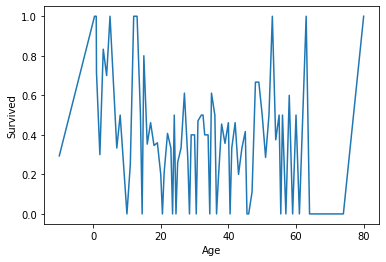

In [323]:
import seaborn as sns

sns.lineplot(age_summary.index, age_summary["Survived"])

<BarContainer object of 891 artists>

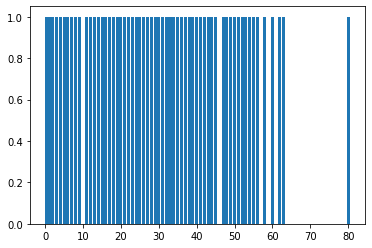

In [444]:
import seaborn as sns

plt.bar(X_train["Age"], y_train)

In [ ]:
plt.scatter(X_train["Age"], y_train, alpha=0.2)

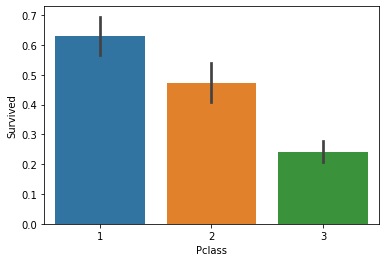

In [449]:
sns.barplot(X_train["Pclass"], y_train)

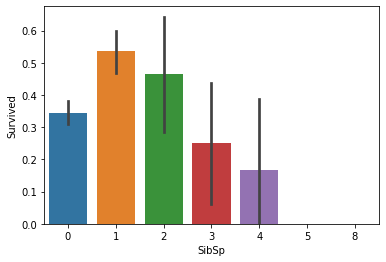

In [446]:
sns.barplot(X_train["SibSp"], y_train)

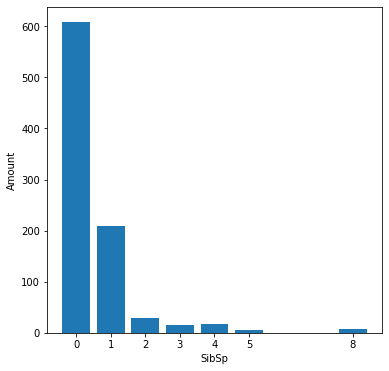

In [465]:
plot_data(X_train, "SibSp")

In [ ]:
plot_data(X_train, "Parch")

In [ ]:
plot_data(X_train, "Fare", size=(15, 6))

In [ ]:
X_train.hist("Fare", bins=25, figsize=(15, 6))

In [ ]:
plot_data(X_train, "Embarked")

## Transform and train

In [570]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
import math

# [(0.04638460022779111, 'SibSp'),
#  (0.27040391523121776, 'Fare'),
#  (0.1004568388833117, 'Pclass_Label'),
#  (0.2586893291579196, 'Sex_Label'),
#  (0.03662212174209829, 'Parch'),
#  (0.2626130004615573, 'Age'),
#  (0.02483019429610427, 'Embarked_S')]

columns = ["Fare", "Pclass_Label", "Sex_Label", "Age"]
#            , "Age_0", "Age_1", "Age_2", "Age_3", "Age_4", "Age_5", "Age_6", "Age_7", "Age_8", "Age_9", "Age_10", "Age_11"]

class TransformData(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_transformed = X.copy()
        
#         PassengerId    891 non-null int64
#         Pclass         891 non-null int64
#         Name           891 non-null object
#         Sex            891 non-null object
#         Age            714 non-null float64
#         SibSp          891 non-null int64
#         Parch          891 non-null int64
#         Ticket         891 non-null object
#         Fare           891 non-null float64
#         Cabin          204 non-null object
#         Embarked       889 non-null object

#         PassengerId    418 non-null int64
#         Pclass         418 non-null int64
#         Name           418 non-null object
#         Sex            418 non-null object
#         Age            332 non-null float64
#         SibSp          418 non-null int64
#         Parch          418 non-null int64
#         Ticket         418 non-null object
#         Fare           417 non-null float64
#         Cabin          91 non-null object
#         Embarked       418 non-null object

        X_transformed["Age"].fillna(X_transformed["Age"].median(), inplace=True)
        
        cut = pd.cut(
                X_transformed["Age"], 
                [-np.inf, 0, 1, 6, 13, 17, 25, 35, 45, 55, 65, 75, np.inf],
                labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

        X_transformed["Age Category"] = cut
        one_hot = pd.get_dummies(X_transformed["Age Category"], prefix="Age")
        X_transformed = X_transformed.join(one_hot)

        scale = StandardScaler()
#         X_transformed["Age"].fillna(-10, inplace=True)
        X_transformed["Age"] = scale.fit_transform(X_transformed[["Age"]])
#         X_transformed["HasAge"] = np.isnan(X_transformed["Age"]) == False
    
#         one_hot = pd.get_dummies(X_transformed["Pclass"], prefix="Pclass")
#         X_transformed = X_transformed.join(one_hot)

        le = LabelEncoder()
        pclass = le.fit_transform(X_transformed["Pclass"])
        X_transformed["Pclass_Label"] = pclass
        
        le = LabelEncoder()
        sex = le.fit_transform(X_transformed["Sex"])
        X_transformed["Sex_Label"] = sex
        
        X_transformed["Embarked"].fillna("NA", inplace=True)
        one_hot = pd.get_dummies(X_transformed["Embarked"], prefix="Embarked")
        X_transformed = X_transformed.join(one_hot)
        
        X_transformed["Fare"].fillna(X_transformed["Fare"].median(), inplace=True)
        
        scale = StandardScaler()
        X_transformed["SibSp"] = scale.fit_transform(X_transformed[["SibSp"]])
        
#         print(X_transformed)
        
        return X_transformed

class SelectColumns(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
#         columns = ["Pclass_1", "Pclass_2", "Pclass_3", "Sex_Label", "Age", "Parch", "Fare", "Embarked_S", "Embarked_C", "Embarked_Q"]
#         columns = ["Pclass_1", "Pclass_2", "Pclass_3", "Sex_Label", "Parch", "Age_0", "Age_1", "Age_2", "Age_3", "Age_4", "Age_5", "Age_6", "Age_7", "Age_8", "Age_9", "Age_10"]
#         columns = ["Pclass_1", "Pclass_2", "Pclass_3", "Sex_Label", "Parch", "Age", "Embarked_S", "Embarked_C", "Embarked_Q"]
#         columns = ["SibSp", "Fare", "Pclass_Label", "Sex_Label", "Parch", "Age", "Embarked_S", "Embarked_C", "Embarked_Q"]
        return X[columns]

In [571]:
pipeline = Pipeline([
    ('transform_data', TransformData()),
    ('select_columns', SelectColumns())
])

X_train_processed = pipeline.fit_transform(X_train)
X_train_processed.head(30)

,Fare,Pclass_Label,Sex_Label,Age
0,7.2500,2,1,-0.565736
1,71.2833,0,0,0.663861
2,7.9250,2,0,-0.258337
3,53.1000,0,0,0.433312
4,8.0500,2,1,0.433312
5,8.4583,2,1,-0.104637
6,51.8625,0,1,1.893459
7,21.0750,2,1,-2.102733
8,11.1333,2,0,-0.181487
9,30.0708,1,0,-1.180535


In [572]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [573]:
log_clf = LogisticRegression()
log_clf.fit(X_train_processed, y_train)

C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [574]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve

In [575]:
def predict_results(model, data, actual):
    predict = model.predict(data)

    predict = cross_val_predict(model, data, actual, cv=3, method="predict_proba")
    predict = predict[:, 1] > 0.5

    total = len(actual)

    correct = sum(predict == actual)
    print(f"\nAccuracy: {correct} out of {total}... {correct / total * 100}%")

    true_negative = sum((predict == actual) & (predict == 0))
    true_positive = sum((predict == actual) & (predict == 1))
    false_negative = sum((predict != actual) & (predict == 0))
    false_positive = sum((predict != actual) & (predict == 1))
    
    conf_matrix = np.array([
        [true_negative, false_positive],
        [false_negative, true_positive]
    ])
    
    print("\nConfusion Matrix:\n", conf_matrix)
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = true_positive / (true_positive + ((false_negative + false_positive) / 2))
    
    print(f"\nPrecision: {precision}, Recall: {recall}, F1 Score: {f1_score}")
    
#     fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
    score = roc_auc_score(actual, predict)
    print("\nArea under curve:", score)
    
    fpr, tpr, thresholds = roc_curve(actual, predict)

    plt.plot(fpr, tpr, "b:", label="")
#     plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
    plt.legend(loc="lower right")
    plt.show()

    return predict


C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Accuracy: 700 out of 891... 78.56341189674522%

Confusion Matrix:
 [[461  88]
 [103 239]]

Precision: 0.7308868501529052, Recall: 0.6988304093567251, F1 Score: 0.7144992526158446

Area under curve: 0.7692694851883808


No handles with labels found to put in legend.


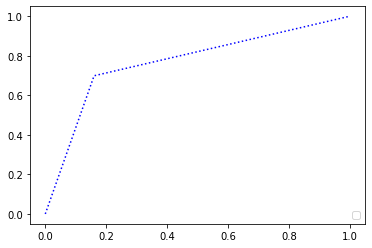

In [576]:
a = predict_results(log_clf, pipeline.fit_transform(X_train), y_train)

In [577]:
forest = RandomForestClassifier()
forest.fit(X_train_processed, y_train)

C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [578]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Accuracy: 705 out of 891... 79.12457912457911%

Confusion Matrix:
 [[473  76]
 [110 232]]

Precision: 0.7532467532467533, Recall: 0.6783625730994152, F1 Score: 0.7138461538461538

Area under curve: 0.7699645288083597


No handles with labels found to put in legend.


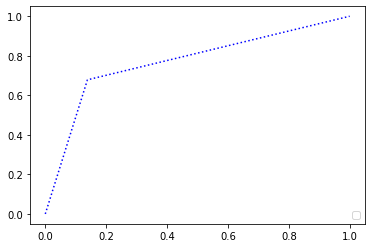

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,

In [579]:
predict_results(forest, pipeline.fit_transform(X_train), y_train)

In [580]:
list(zip(forest.feature_importances_, 
    columns
))

[(0.334743040851135, 'Fare'),
 (0.10998024409758896, 'Pclass_Label'),
 (0.2808954389717655, 'Sex_Label'),
 (0.2743812760795107, 'Age')]

In [557]:
gender_submission = pd.read_csv(os.path.join(titanic_path, "gender_submission.csv"))

In [558]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [559]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB


In [560]:
predict = forest.predict(pipeline.fit_transform(X_test))

In [561]:
len(predict)

418

In [562]:
gender_submission["Survived"] = predict

In [563]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [564]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB


In [565]:
submit_path = os.path.join(titanic_path, "submit.csv")
gender_submission.to_csv(submit_path, index=False)

In [566]:
test_submit = pd.read_csv(submit_path)
test_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [567]:
from subprocess import Popen, check_call, check_output
import subprocess

In [568]:
def submit(submit_path, message):
    try:
        print(check_output(["kaggle", "competitions", "submit", "titanic", "-f", submit_path, "-m", message], 
                           shell=True, text=True, stderr=subprocess.STDOUT))
    except subprocess.CalledProcessError as e:
        print('error>', e.output, '<')


In [569]:
submit(submit_path, "Third submission")


  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 9.52kB/s]
100%|##########| 3.18k/3.18k [00:04<00:00, 680B/s]  
Successfully submitted to Titanic: Machine Learning from Disaster


## Results

First submission:

Score: 0.75598

Accuracy: 710 out of 891... 79.68574635241302%

Confusion Matrix:

 [[488  61]
 
 [120 222]]

Precision: 0.784452296819788, Recall: 0.6491228070175439, F1 Score: 0.7104

Area under curve: 0.7690058479532164